In [ ]:
import torch
import torchvision
import torchvision.datasets
import torchvision.transforms
import torch.utils.data
import torch.nn
import os
from matplotlib import pyplot as plot

Files already downloaded and verified
Files already downloaded and verified
Количество тренировочных данных:  50000
Количество тестировочных данных:  10000


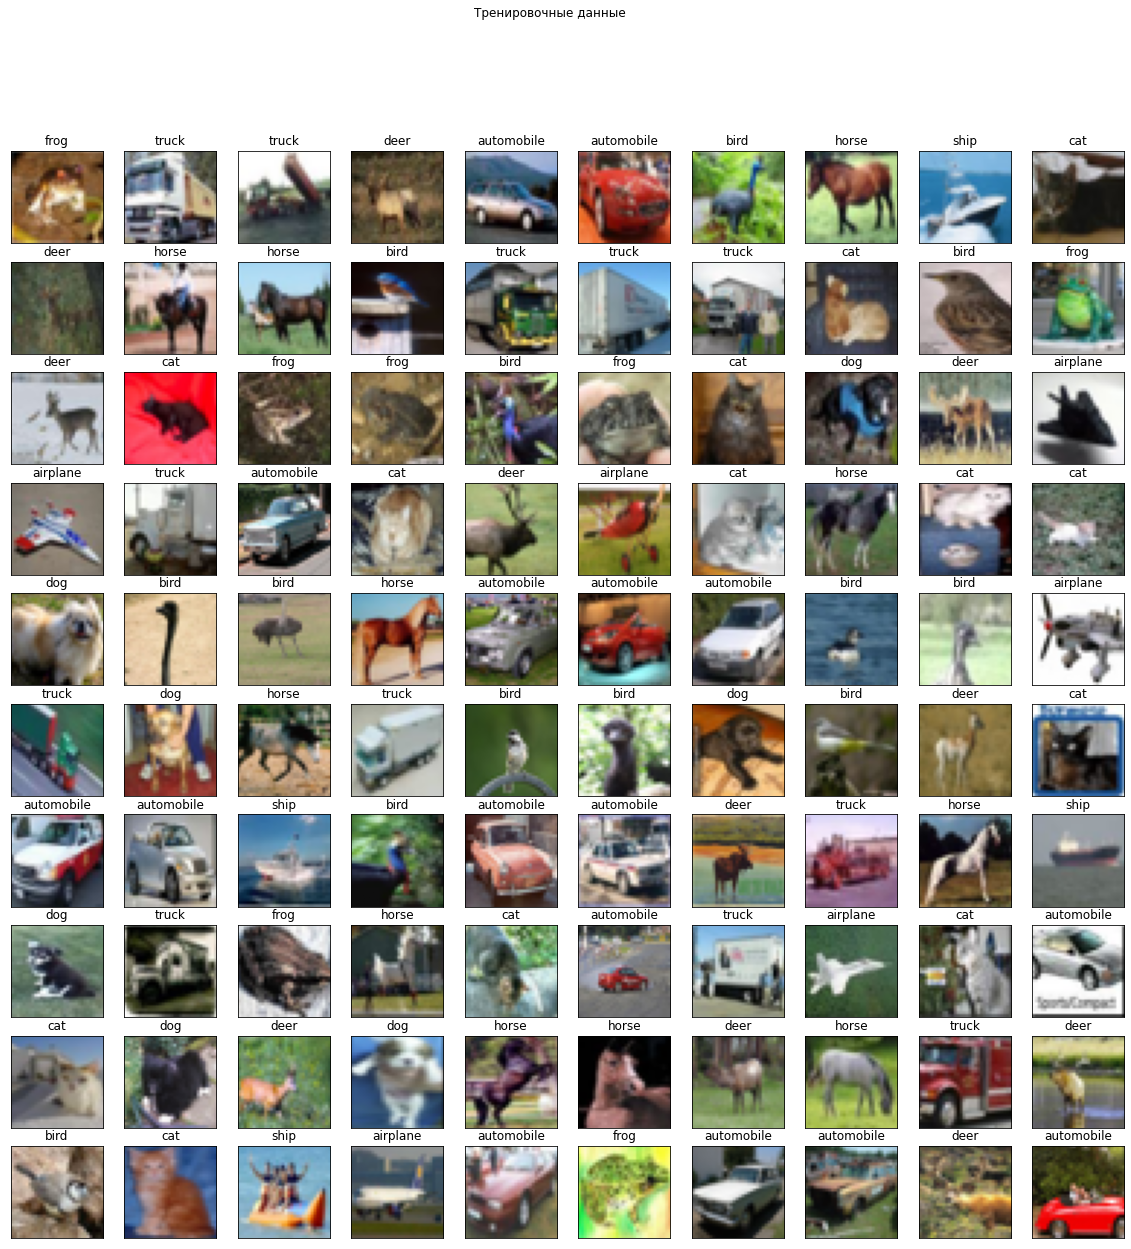

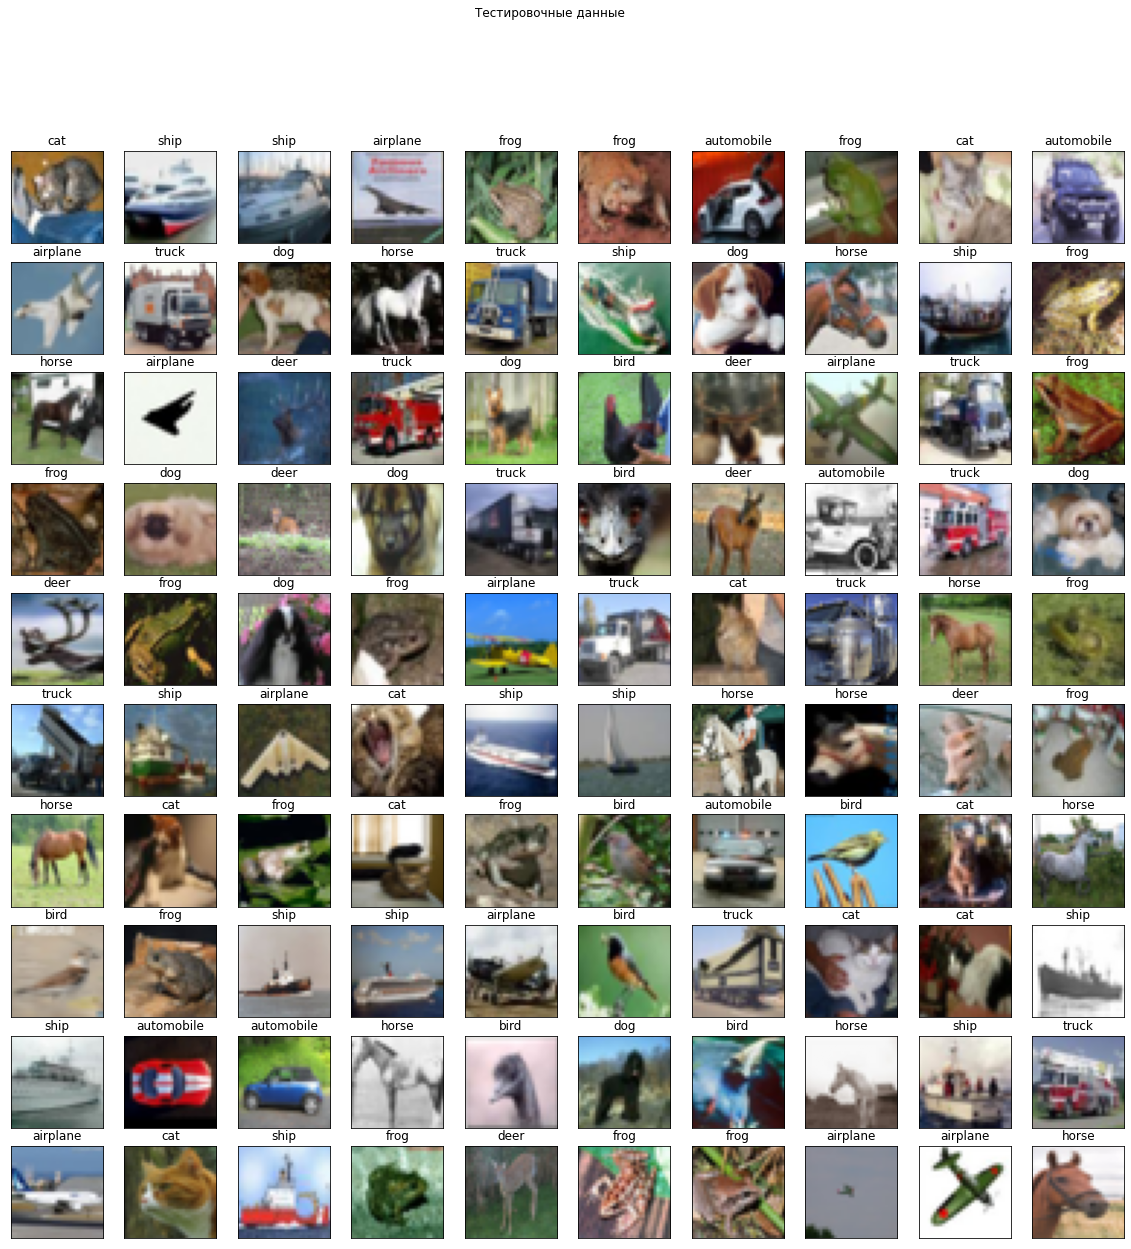

In [ ]:
# Загрузка набора данных CIFAR10

dir_name = os.getcwd() # данные будут скачиваться в текущую папку
batch_size = 128 # размер обрабатываемой пачки данных
# Функция для демонстрации изображений
def show_images(images, title):
    num_showed_imgs_x = 10
    num_showed_imgs_y = 10

    table = {0: "airplane",
            1: "automobile",
            2 : "bird",
            3 : "cat",
            4 : "deer",
            5 : "dog",
            6 : "frog",
            7 : "horse",
            8 : "ship",
            9 : "truck"}

    figsize = (20, 20)
    fig, axes = plot.subplots(num_showed_imgs_y, num_showed_imgs_x, figsize = figsize)
    fig.suptitle(title)
    plot.setp(plot.gcf().get_axes(), xticks = [], yticks = [])
    for i, ax in enumerate(axes.flat):
        # images[i][0] - изображение в виде тензора
        # images[i][1] - число, означающее принадлежность к классу
        img = images[i][0].numpy().transpose(1, 2, 0) # меняем оси
        ax.imshow(img)  # вывод изображения
        ax.set_title(table[images[i][1]]) # вывод метки изображения

# Чтение тренировочной и тестовой выборок набора данных CIFAR10.
# Данные представляются в виде пар, где первый элемент - 
# изображение в формате PIL.Image.Image, а второй - целочисленная метка класса.

# С помощью transform преобразуем изображение в torch.Tensor
# изображений в формат torch.Tensor для последующей работы

train_dataset = torchvision.datasets.CIFAR10(root = dir_name, train = True, download = True,
                                           transform = torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.CIFAR10(root = dir_name, train = False, download = True,
                                          transform = torchvision.transforms.ToTensor())

# Вывод информации о данных
print('Количество тренировочных данных: ', len(train_dataset))
show_images(train_dataset, 'Тренировочные данные')

print('Количество тестировочных данных: ', len(test_dataset))
show_images(test_dataset, 'Тестировочные данные')

# Создание объектов для последовательной загрузки пачек
# из тренировочной и тестовой выборок
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size,
                                                shuffle = True)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size,
                                               shuffle = False)

In [ ]:
# Создание модели

# Создание класса сети
class ConvolutionalNeuralNetwork(torch.nn.Module):
    # Конструктор
    def __init__(self):
        super(ConvolutionalNeuralNetwork, self).__init__()
        # Свертка. Размер результирующей карты признаков:
        # 64 x ((32-5)/1+1) x ((32-1)/2+1) = 64 x 28 x 28
        self.conv1 = torch.nn.Conv2d(in_channels = 3, out_channels = 64, 
                                    kernel_size = 5, stride = 1)
        # Функция активации. Размер результирующей карты признаков:
        #64 x 28 x 28
        self.activation = torch.nn.ReLU()
        # Пространственное объединение по максимуму. Размер результирующей карты признаков:
        # 64 x ((28-2)/2+1) x ((28-2)/2+1) = 64 x 14 x 14 после первого вызова
        # 128 x ((12-2)/2+1) x ((12-2)/2+1) = 128 x 6 x 6 после второго вызова (после conv2)
        self.pooling = torch.nn.MaxPool2d(kernel_size = 2, stride = 2)
        # 128 x ((14-3)/1+1) x ((14-3)/1+1) = 128 x 12 x 12
        self.conv2 = torch.nn.Conv2d(in_channels=64, out_channels=128,
                                     kernel_size=3, stride = 1)
        self.fc1 = torch.nn.Linear(128 * 6 * 6, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)

    # Переопределение метода, вызываемого в процессе прямого прохода
    def forward(self, x):
        # Свертка и активация
        out = self.activation(self.conv1(x))
        # Пространственное объединение
        out = self.pooling(out)
        # Свертка и активация
        out = self.activation(self.conv2(out))
        # Пространственное объединение
        out = self.pooling(out)
        # Изменение формата хранения тензора из (B, C, W, H) в (B, C*W*H)
        out = out.view(out.size(0), -1)
        # Полносвязные слои и активация
        out = self.activation(self.fc1(out))
        out = self.activation(self.fc2(out))
        out = self.fc3(out)
        return out

# Создание объекта модели
cnn_model = ConvolutionalNeuralNetwork()

# Вывод информации о модели
print('Parameters of convolutions 1:\n1. Kernels = {}\n2. Biases = {}'.
format(cnn_model.conv1.weight.shape, cnn_model.conv1.bias.shape))
print('Parameters of convolutions 2:\n1. Kernels = {}\n2. Biases = {}'.
format(cnn_model.conv2.weight.shape, cnn_model.conv2.bias.shape))
print('Parameters of fully-connected layer 1:\n1. Weight matrix = {}\n2. Biases = {}'.
format(cnn_model.fc1.weight.shape, cnn_model.fc1.bias.shape))
print('Parameters of fully-connected layer 2:\n1. Weight matrix = {}\n2. Biases = {}'.
format(cnn_model.fc2.weight.shape, cnn_model.fc2.bias.shape))
print('Parameters of fully-connected layer 2:\n1. Weight matrix = {}\n2. Biases = {}'.
format(cnn_model.fc3.weight.shape, cnn_model.fc3.bias.shape))

Parameters of convolutions 1:
1. Kernels = torch.Size([64, 3, 5, 5])
2. Biases = torch.Size([64])
Parameters of convolutions 2:
1. Kernels = torch.Size([128, 64, 3, 3])
2. Biases = torch.Size([128])
Parameters of fully-connected layer 1:
1. Weight matrix = torch.Size([128, 4608])
2. Biases = torch.Size([128])
Parameters of fully-connected layer 2:
1. Weight matrix = torch.Size([64, 128])
2. Biases = torch.Size([64])
Parameters of fully-connected layer 2:
1. Weight matrix = torch.Size([10, 64])
2. Biases = torch.Size([10])


In [ ]:
print(cnn_model)

ConvolutionalNeuralNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (activation): ReLU()
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=4608, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
# Обучение построенной модели

learning_rate = 0.1 # alpha
num_epochs = 26 # количество эпох

# Выбор устройства для вычислений
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)
# Функция ошибки
loss_function = torch.nn.CrossEntropyLoss()
# Метод оптимизации
optimizer = torch.optim.SGD(cnn_model.parameters(), lr = learning_rate)
 
# Функция вычисления точности top-1
def get_accuracy(data_loader, model):
    tp = 0
    n = 0
    with torch.no_grad():
        for images, labels in data_loader: # проход по всем данным

            images = images.requires_grad_().to(device)
            labels = labels.to(device)
            outputs = model(images)
            # Выбор предсказанных меток с максимальной достоверностью.
            # векторов достоверности принадлежности каждому из 10 допустимых классов
            # predicted - объект типа torch.tensor (одномерный тензор меток классов).
            # Выбор максимальных значений выполняется по первой размерности
            _, predicted = torch.max(outputs.data, 1) # записывает индексы (принадлежность классу)
            n += labels.size(0)
            tp += (predicted == labels).sum() # определение количества совпадений
    return tp / n

import time
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data_loader): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = cnn_model(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки
        # Обратный проход
        optimizer.zero_grad() # обнуление градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Вывод точности на тренировочных данных после завершения эпохи
    print('Epoch[{}]: accuracy = {}'.format(epoch, get_accuracy(train_data_loader, cnn_model)))

# Вывод времени обучения и информации о параметрах алгоритма
print('Time: {:.2f} s'.format(time.time() - training_start_time))
print("Num epochs: ", num_epochs)
print("Optimizer:\n ", optimizer)

Epoch[0]: accuracy = 0.28158000111579895
Epoch[1]: accuracy = 0.45027998089790344
Epoch[2]: accuracy = 0.5308399796485901
Epoch[3]: accuracy = 0.5797799825668335
Epoch[4]: accuracy = 0.6211199760437012
Epoch[5]: accuracy = 0.6637200117111206
Epoch[6]: accuracy = 0.6739799976348877
Epoch[7]: accuracy = 0.7460199594497681
Epoch[8]: accuracy = 0.767579972743988
Epoch[9]: accuracy = 0.8014199733734131
Epoch[10]: accuracy = 0.799519956111908
Epoch[11]: accuracy = 0.8647599816322327
Epoch[12]: accuracy = 0.8593800067901611
Epoch[13]: accuracy = 0.8656799793243408
Epoch[14]: accuracy = 0.9259999990463257
Epoch[15]: accuracy = 0.9116199612617493
Epoch[16]: accuracy = 0.9601399898529053
Epoch[17]: accuracy = 0.9306599497795105
Epoch[18]: accuracy = 0.981499969959259
Epoch[19]: accuracy = 0.9288399815559387
Epoch[20]: accuracy = 0.9806399941444397
Epoch[21]: accuracy = 0.9889599680900574
Epoch[22]: accuracy = 0.9766799807548523
Epoch[23]: accuracy = 0.9903799891471863
Epoch[24]: accuracy = 0.994

In [ ]:
# Дообучение с меньшим шагом

learning_rate = 0.01 # alpha
num_epochs = 10 # количество эпох

# Выбор устройства для вычислений
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)
# Функция ошибки
loss_function = torch.nn.CrossEntropyLoss()
# Метод оптимизации
optimizer = torch.optim.SGD(cnn_model.parameters(), lr = learning_rate)
 
# Функция вычисления точности top-1
def get_accuracy(data_loader, model):
    tp = 0
    n = 0
    with torch.no_grad():
        for images, labels in data_loader: # проход по всем данным

            images = images.requires_grad_().to(device)
            labels = labels.to(device)
            outputs = model(images)
            # Выбор предсказанных меток с максимальной достоверностью.
            # векторов достоверности принадлежности каждому из 10 допустимых классов
            # predicted - объект типа torch.tensor (одномерный тензор меток классов).
            # Выбор максимальных значений выполняется по первой размерности
            _, predicted = torch.max(outputs.data, 1) # записывает индексы (принадлежность классу)
            n += labels.size(0)
            tp += (predicted == labels).sum() # определение количества совпадений
    return tp / n

import time
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data_loader): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = cnn_model(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки
        # Обратный проход
        optimizer.zero_grad() # обнуление градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Вывод точности на тренировочных данных после завершения эпохи
    print('Epoch[{}]: accuracy = {}'.format(epoch, get_accuracy(train_data_loader, cnn_model)))

# Вывод времени обучения и информации о параметрах алгоритма
print('Time: {:.2f} s'.format(time.time() - training_start_time))
print("Num epochs: ", num_epochs)
print("Optimizer:\n ", optimizer)

Epoch[0]: accuracy = 0.9997599720954895
Epoch[1]: accuracy = 1.0
Epoch[2]: accuracy = 1.0
Epoch[3]: accuracy = 1.0
Epoch[4]: accuracy = 1.0
Epoch[5]: accuracy = 1.0
Epoch[6]: accuracy = 1.0
Epoch[7]: accuracy = 1.0
Epoch[8]: accuracy = 1.0
Epoch[9]: accuracy = 1.0
Time: 144.39 s
Num epochs:  10
Optimizer:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [ ]:
# Тестирование обученной модели
test_start_time = time.time()
# Вывод точности на тестовых данных
print('Test accuracy: {}'.format(get_accuracy(test_data_loader, cnn_model)))
print('Time: {} s'.format((time.time() - test_start_time) / (len(test_data_loader) * batch_size)))

Test accuracy: 0.7071999907493591
Time: 0.00010789367311362978 s
